In [2]:
import pandasql
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt

In [3]:
df = pd.read_excel(r"C:\Gitlab clone\Simple data analysis\simple-data-analysis-tools\Kieran data files\Example datasets\flights.xlsx")

In [4]:
df.head(10)

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
5,1949,June,135
6,1949,July,148
7,1949,August,148
8,1949,September,136
9,1949,October,119


In [5]:
#create own data from my lists
#month name and values will be used as a lookup further in the demo

Month = ['January','February','March','April','May','June','July','August','September','October','November','December']
Month_val = [1,2,3,4,5,6,7,8,9,10,11,12]

#create a frame using the two lists above

frame = { 'month': Month, 'Month_Val': Month_val} 

#create and name the dataframe below
lookup = pd.DataFrame(frame)
lookup

,month,Month_Val
0,January,1
1,February,2
2,March,3
3,April,4
4,May,5
5,June,6
6,July,7
7,August,8
8,September,9
9,October,10


In [6]:
#pandas equivalent of vlookup
#need to perform the merge action
#create a new dataframe called df_new by mergeing original DF with the new lookup datframe 'created above' joining on the month field using a left join
#the on value can be amended along with the how - how is the different type of joins that can be used (left, right, outer, inner etc)

df_new = df.merge(lookup, on = 'month', how ='left')

df_new

,year,month,passengers,Month_Val
0,1949,January,112,1
1,1949,February,118,2
2,1949,March,132,3
3,1949,April,129,4
4,1949,May,121,5
...,...,...,...,...
139,1960,August,606,8
140,1960,September,508,9
141,1960,October,461,10
142,1960,November,390,11


In [7]:
#example of how to create a new column
df_new['test1'] = df_new['year'] *2
df_new

#remove the ## in the code below to remove the new column

#example of how to drop a column
#df_new = df_new.drop(columns = ['test1'])
#df_new

,year,month,passengers,Month_Val,test1
0,1949,January,112,1,3898
1,1949,February,118,2,3898
2,1949,March,132,3,3898
3,1949,April,129,4,3898
4,1949,May,121,5,3898
...,...,...,...,...,...
139,1960,August,606,8,3920
140,1960,September,508,9,3920
141,1960,October,461,10,3920
142,1960,November,390,11,3920


# Section 2 - running filters and queries

## filter by selection

In [8]:
#this creates a test filter on the dataframe - what I am doing is assigning the filter to a variable

test = (df_new['year'] ==1949)

#you then reference the query against the dataframe of choice
df_new[test]
#df[test]

,year,month,passengers,Month_Val,test1
0,1949,January,112,1,3898
1,1949,February,118,2,3898
2,1949,March,132,3,3898
3,1949,April,129,4,3898
4,1949,May,121,5,3898
5,1949,June,135,6,3898
6,1949,July,148,7,3898
7,1949,August,148,8,3898
8,1949,September,136,9,3898
9,1949,October,119,10,3898


In [9]:
#alternatively, could just pass the filter directly in the dataframe as shown below

#df[df['year'] ==1949]

#this can be used for multiple dataframe
#df_new[df_new['year'] ==1949]

#this can be used for multiple dataframe
df_new[df_new['month'] =='October']




,year,month,passengers,Month_Val,test1
9,1949,October,119,10,3898
21,1950,October,133,10,3900
33,1951,October,162,10,3902
45,1952,October,191,10,3904
57,1953,October,211,10,3906
69,1954,October,229,10,3908
81,1955,October,274,10,3910
93,1956,October,306,10,3912
105,1957,October,347,10,3914
117,1958,October,359,10,3916


In [10]:
#multiple queries 

#filter the dateframe where year = 1949 and month = May
#df[(df['year'] ==1949) & (df['month'] == 'May')]


df_new[(df_new['year'] ==1949) & (df_new['month'] == 'May')]


,year,month,passengers,Month_Val,test1
4,1949,May,121,5,3898


# 2.1 - Using the AND operator 

In [11]:
#filter the dateframe where year = 1949 AND month = February
#df[(df['year'] ==1949) & (df['month'] == 'February')]


df_new[(df_new['year'] ==1949) & (df_new['month'] == 'February')]


,year,month,passengers,Month_Val,test1
1,1949,February,118,2,3898


In [12]:
#filter the dateframe where year < 1960 AND month = February
#df[(df['year'] < 1960) & (df['month'] == 'February')]


df_new[(df_new['year'] < 1960) & (df_new['month'] == 'February')]

,year,month,passengers,Month_Val,test1
1,1949,February,118,2,3898
13,1950,February,126,2,3900
25,1951,February,150,2,3902
37,1952,February,180,2,3904
49,1953,February,196,2,3906
61,1954,February,188,2,3908
73,1955,February,233,2,3910
85,1956,February,277,2,3912
97,1957,February,301,2,3914
109,1958,February,318,2,3916


# 2.2 - Using the 'Sortby' opeator

In [13]:
#filter the dateframe where year < 1960 and passengers < 230
#then sort by passengers values largest to smallest

#default value is to sort by the selected field ascending otherwise this will need to be specified
#df[(df['year'] < 1960) & (df['passengers'] < 230)].sort_values(by = ['passengers'])


df_new[(df_new['year'] < 1960) & (df_new['passengers'] < 230)].sort_values(by = ['passengers'])
#df_new[(df_new['year'] < 1960) & (df_new['passengers'] < 230)].sort_values(by = ['passengers'],ascending = False)
#df_new[(df_new['year'] < 1960) & (df_new['passengers'] < 230)].sort_values(by = ['Month_Val','passengers'],ascending = (True,False))



#specifying the sort by order
#df_new[(df_new['year'] < 1960) & (df_new['passengers'] < 230)]\
#.sort_values(by = ['passengers']\
#    ,ascending = False)\
#        .head(10)


,year,month,passengers,Month_Val,test1
10,1949,November,104,11,3898
0,1949,January,112,1,3898
22,1950,November,114,11,3900
12,1950,January,115,1,3900
1,1949,February,118,2,3898
11,1949,December,118,12,3898
9,1949,October,119,10,3898
4,1949,May,121,5,3898
16,1950,May,125,5,3900
13,1950,February,126,2,3900


In [15]:
#Sorting by multiple values

df_new[df_new['year'] < 1955].sort_values(by = ['Month_Val','passengers'], ascending = (True , False))

#Sorting by multiple values (different syntax)

df_new[df_new['year'] < 1955]\
    .sort_values(by = ['Month_Val','passengers']\
        , ascending = (True , False))




,year,month,passengers,Month_Val,test1
60,1954,January,204,1,3908
48,1953,January,196,1,3906
36,1952,January,171,1,3904
24,1951,January,145,1,3902
12,1950,January,115,1,3900
...,...,...,...,...,...
59,1953,December,201,12,3906
47,1952,December,194,12,3904
35,1951,December,166,12,3902
23,1950,December,140,12,3900


In [16]:
#multiple queries 

#filter the dateframe where year = 1949 and month = May
df_new[(df_new['year'] ==1949) & (df_new['month'] == 'May')]

#filter the dateframe where year = 1949 and month = February
df_new[(df_new['year'] ==1949) & (df_new['month'] == 'February')]

#filter the dateframe where year < 1960 and month = February
df_new[(df_new['year'] < 1960) & (df_new['month'] == 'February')]

#filter the dateframe where year < 1960 and passengers < 230
#then sort by passengers values largest to smallest
df_new[(df_new['year'] < 1960) & (df_new['passengers'] < 230)].sort_values(by = ['passengers'],ascending = False)



,year,month,passengers,Month_Val,test1
71,1954,December,229,12,3908
69,1954,October,229,10,3908
52,1953,May,229,5,3906
63,1954,April,227,4,3908
41,1952,June,218,6,3904
57,1953,October,211,10,3906
44,1952,September,209,9,3904
60,1954,January,204,1,3908
70,1954,November,203,11,3908
59,1953,December,201,12,3906


## 2.3 Group by function

In [29]:
#this can be used to group the dataframe in order to get counts, means, sums etc

#step 1 - filter dataframe as you require
df_new[(df_new['year'] < 1954) & (df_new['passengers'] < 230)]\
.groupby(by = ['month','passengers'])\
.sum()\
.sort_values(by = ['Month_Val','passengers'],ascending = (True, False))\
.head(30)
    #then perform the group by on the columns you want - in this case we want to group on the month and passenger fields

        #action to be performed is the sum

            #now that the group by action has been perfomed now want to sort the results via month and passengers values

                #only want to return the first 30 rows

#create a new dataframe of this result
abc = df_new[(df_new['year'] < 1954) & (df_new['passengers'] < 230)].groupby(by = ['month','passengers']).sum().sort_values(by = ['Month_Val','passengers'],ascending = (True, False)).head(30)


In [30]:
#can then select rows, columns from the group by functions above
# iloc function slices the data frame by row and then columns
#remember the index starts from zero

#return the first 4 rows and all columns
abc.iloc[0:4,:]

#return the first 10 rows and all columns
abc.iloc[0:10,:]

#Reutrn the first column
abc.iloc[0:10,:0]

#Reutrn the first two columns
abc.iloc[0:10,0:1]

#Reutrn all columns
abc.iloc[0:10,:]



year  Month_Val  test1
month    passengers                        
January  196         1953          1   3906
         171         1952          1   3904
         145         1951          1   3902
         115         1950          1   3900
         112         1949          1   3898
February 196         1953          2   3906
         180         1952          2   3904
         150         1951          2   3902
         126         1950          2   3900
         118         1949          2   3898

## Section 3 - running SQL queries in notebooks

In [19]:
df_new

,year,month,passengers,Month_Val,test1
0,1949,January,112,1,3898
1,1949,February,118,2,3898
2,1949,March,132,3,3898
3,1949,April,129,4,3898
4,1949,May,121,5,3898
...,...,...,...,...,...
139,1960,August,606,8,3920
140,1960,September,508,9,3920
141,1960,October,461,10,3920
142,1960,November,390,11,3920


In [20]:
sql_test = df_new

In [21]:
sql_test

,year,month,passengers,Month_Val,test1
0,1949,January,112,1,3898
1,1949,February,118,2,3898
2,1949,March,132,3,3898
3,1949,April,129,4,3898
4,1949,May,121,5,3898
...,...,...,...,...,...
139,1960,August,606,8,3920
140,1960,September,508,9,3920
141,1960,October,461,10,3920
142,1960,November,390,11,3920


In [22]:
sqla = pandasql.sqldf("select * from sql_test")
        #where month = 'January' and passengers < 200 order by passengers desc\""
sqla

,year,month,passengers,Month_Val,test1
0,1949,January,112,1,3898
1,1949,February,118,2,3898
2,1949,March,132,3,3898
3,1949,April,129,4,3898
4,1949,May,121,5,3898
...,...,...,...,...,...
139,1960,August,606,8,3920
140,1960,September,508,9,3920
141,1960,October,461,10,3920
142,1960,November,390,11,3920


In [23]:
a = pandasql.sqldf("select month,passengers,Month_Val,sum(passengers) as count from sql_test\
    group by month,Month_Val order by 3,4 desc")

a = a.iloc[:,[0,3]]
a

,month,count
0,January,2901
1,February,2820
2,March,3242
3,April,3205
4,May,3262
5,June,3740
6,July,4216
7,August,4213
8,September,3629
9,October,3199


<AxesSubplot:xlabel='month', ylabel='count'>

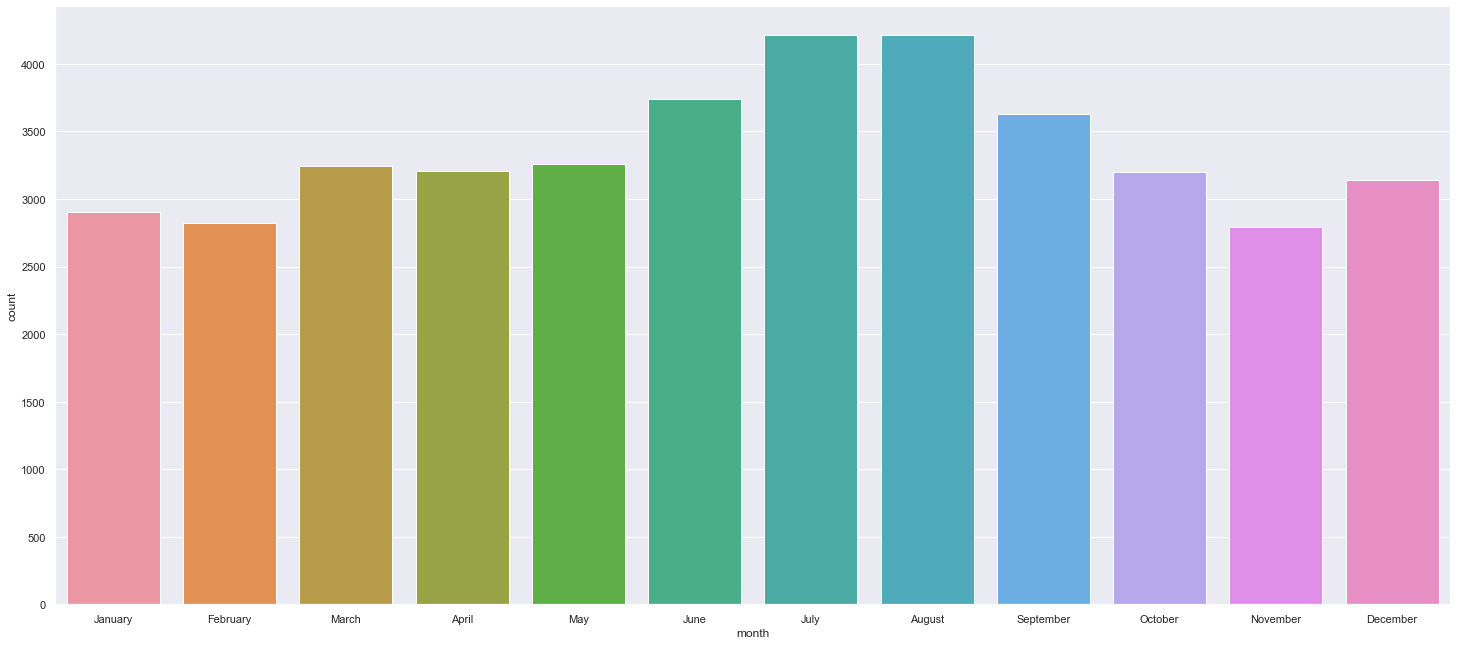

In [25]:
sb.set(rc={'figure.figsize':(25,11)})

sb.barplot(data = a, x = 'month', y = 'count')

In [31]:
import cx_Oracle
import os
import platform

lib_dir = r"C:\Oracle\product\12.1.0\client_12c_64\instantclient\instantclient_19_10"
cx_Oracle.init_oracle_client(lib_dir)

# #create connection

# dsn_tns = cx_Oracle.makedsn(r'ruupgisd06.uug.vcm.cc', r'1521', service_name=r'GISPCWG1.UUG.VCM.CC')
# conn = cx_Oracle.connect(user=r'MIG_REC', password=r'wteYM3RdU0m1tDObnpqA', dsn=dsn_tns)

# cursor = conn.cursor()
# cursor.execute("select address_id from uuaddress.uuaddress@dm_prod_cag where postcode like '%M45 6T%'")

# df_sql = cursor.fetchall()
# print(df_sql)






DatabaseError: DPI-1047: Cannot locate a 64-bit Oracle Client library: "The specified module could not be found". See https://cx-oracle.readthedocs.io/en/latest/user_guide/installation.html for help

In [28]:
import os
import platform

# This is the path to the ORACLE client files
# lib_dir = r"C:\Oracle\product\11.2.0\client_1\bin"

lib_dir = r"C:\Oracle\product\12.1.0\client_12c_64\instantclient\instantclient_19_10"

# Diagnostic output to verify 64 bit arch and list files
print("ARCH:", platform.architecture())
print("FILES AT lib_dir:")
for name in os.listdir(lib_dir):
    print(name)
    

    
cx_Oracle.init_oracle_client(lib_dir)
cx_Oracle.clientversion()      


ARCH: ('64bit', 'WindowsPE')
FILES AT lib_dir:


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Oracle\\product\\12.1.0\\client_12c_64\\instantclient\\instantclient_19_10'